In [1]:
!pip install opencv-contrib-python

In [1]:
import os
import cv2
import PIL
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split


In [2]:
import tensorflow as tf

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, MaxPooling3D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import shutil  # Add this line
import pathlib

In [4]:


# Set your dataset path
data_dir = r'F:\Batanikaya\all_dataset'
data_dir = pathlib.Path(data_dir)


In [5]:

from pathlib import WindowsPath

data = [
   WindowsPath('F:/Batanikaya/all_dataset/Aloevera-Aloe barbadensis'),
 WindowsPath('F:/Batanikaya/all_dataset/Amaranthus Green_Amaranthus viridis'),
 WindowsPath('F:/Batanikaya/all_dataset/Amaranthus Red_Amaranthus tricolor'),
 WindowsPath('F:/Batanikaya/all_dataset/Amla-Phyllanthus emlica Linn'),
 WindowsPath('F:/Batanikaya/all_dataset/Amruta Balli-Tinospora cordifolia'),
 WindowsPath('F:/Batanikaya/all_dataset/Arali-Nerium oleander'),
 WindowsPath('F:/Batanikaya/all_dataset/Arive_Dantu_Amaranthus viridis'),
 WindowsPath('F:/Batanikaya/all_dataset/Ashoka-Saraca asoca'),
 WindowsPath('F:/Batanikaya/all_dataset/Ashwagandha_Withania somnifera'),
 WindowsPath('F:/Batanikaya/all_dataset/Asthma plant_Euphorbia hirta'),
 WindowsPath('F:/Batanikaya/all_dataset/Astma_weed'),
 WindowsPath('F:/Batanikaya/all_dataset/Avacado_Persea americana'),
 WindowsPath('F:/Batanikaya/all_dataset/Avaram_Senna auriculata'),
 WindowsPath('F:/Batanikaya/all_dataset/Badipala'),
 WindowsPath('F:/Batanikaya/all_dataset/Balloon vine_Cardiospermum halicacabum'),
 WindowsPath('F:/Batanikaya/all_dataset/Bamboo-Bambusoideae'),
 WindowsPath('F:/Batanikaya/all_dataset/Basale_Basella alba'),
 WindowsPath('F:/Batanikaya/all_dataset/Beans-Vigna spp. (Genus) or Phaseolus spp. (Genus)'),
 WindowsPath('F:/Batanikaya/all_dataset/Bellyache bush (Green)_Jatropha gossypiifolia'),
 WindowsPath('F:/Batanikaya/all_dataset/Benghal dayflower_ Commelina benghalensis'),
 WindowsPath('F:/Batanikaya/all_dataset/Betel-Piper betle'),
 WindowsPath('F:/Batanikaya/all_dataset/Betel_Nut_Areca catechu'),
 WindowsPath('F:/Batanikaya/all_dataset/Big Caltrops_Tribulus terrestris'),
 WindowsPath('F:/Batanikaya/all_dataset/Black-Honey Shrub_Tribulus terrestris'),
 WindowsPath('F:/Batanikaya/all_dataset/Brahmi-Bacopa monnieri'),
 WindowsPath('F:/Batanikaya/all_dataset/Bringaraja-Eclipta prostrata'),
 WindowsPath('F:/Batanikaya/all_dataset/Bristly Wild Grape_Cissus quadrangularis'),
 WindowsPath('F:/Batanikaya/all_dataset/Butterfly Pea_Clitoria ternatea'),
 WindowsPath('F:/Batanikaya/all_dataset/Camphor-Cinnamomum camphora'),
 WindowsPath('F:/Batanikaya/all_dataset/Cape Gooseberry_Physalis peruviana'),
 WindowsPath('F:/Batanikaya/all_dataset/Cardiospermum halicacabum'),
 WindowsPath('F:/Batanikaya/all_dataset/Caricature'),
 WindowsPath('F:/Batanikaya/all_dataset/Castor-Ricinus communis'),
 WindowsPath('F:/Batanikaya/all_dataset/Catharanthus'),
 WindowsPath('F:/Batanikaya/all_dataset/Celery_Apium graveolens'),
 WindowsPath('F:/Batanikaya/all_dataset/Chakte'),
 WindowsPath('F:/Batanikaya/all_dataset/Chilly-Capsicum spp. (Genus)'),
 WindowsPath('F:/Batanikaya/all_dataset/Chinese Spinach_Amaranthus dubius'),
 WindowsPath('F:/Batanikaya/all_dataset/Citron lime (herelikai)-Citrus medica (Citron) or Citrus aurantiifolia (Lime)'),
 WindowsPath('F:/Batanikaya/all_dataset/coatbuttons_Tridax procumbens'),
 WindowsPath('F:/Batanikaya/all_dataset/Coffee-Coffea spp. (Genus)'),
 WindowsPath('F:/Batanikaya/all_dataset/Common rue(naagdalli)- Ruta graveolens'),
 WindowsPath('F:/Batanikaya/all_dataset/Common Wireweed_Sida rhombifolia'),
 WindowsPath('F:/Batanikaya/all_dataset/Coriander-Coriandrum sativum'),
 WindowsPath('F:/Batanikaya/all_dataset/Country Mallow_Abutilon indicum'),
 WindowsPath('F:/Batanikaya/all_dataset/crape Jasmine_Tabernaemontana divaricata'),
 WindowsPath('F:/Batanikaya/all_dataset/Crown flower_Calotropis gigantea'),
 WindowsPath('F:/Batanikaya/all_dataset/Curry Leaf-Murraya koenigii'),
 WindowsPath('F:/Batanikaya/all_dataset/Doddapatre-Plectanthus amboinicus'),
 WindowsPath('F:/Batanikaya/all_dataset/Drumstick- Moringa oleifera'),
 WindowsPath('F:/Batanikaya/all_dataset/Dwarf Copperleaf (Green)_Acalypha reptans'),
 WindowsPath('F:/Batanikaya/all_dataset/Dwarf copperleaf (Red)_ Acalypha wilkesiana'),
 WindowsPath('F:/Batanikaya/all_dataset/Ekka-Calotropis gigantea'),
 WindowsPath('F:/Batanikaya/all_dataset/Eucalyptus-Eucalyptus spp. (Genus)'),
 WindowsPath('F:/Batanikaya/all_dataset/False Amarnath_Digera muricata'),
 WindowsPath('F:/Batanikaya/all_dataset/Fenugreek Leaves_ Trigonella foenum-graecum'),
 WindowsPath('F:/Batanikaya/all_dataset/Ganigale'),
 WindowsPath('F:/Batanikaya/all_dataset/Ganike-Solanum nigrum'),
 WindowsPath('F:/Batanikaya/all_dataset/Gasagase-Grewia asiatica'),
 WindowsPath('F:/Batanikaya/all_dataset/Gauva-Psidium guajava'),
 WindowsPath('F:/Batanikaya/all_dataset/Geranium_ Pelargonium spp. (Genus)'),
 WindowsPath('F:/Batanikaya/all_dataset/Giant Pigweed_Amaranthus titan'),
 WindowsPath('F:/Batanikaya/all_dataset/Ginger-Zingiber officinale'),
 WindowsPath('F:/Batanikaya/all_dataset/Globe Amarnath-Gomphrena globosa'),
 WindowsPath('F:/Batanikaya/all_dataset/Gongura_Hibiscus sabdariffa'),
 WindowsPath('F:/Batanikaya/all_dataset/Green Chireta_Andrographis paniculata'),
 WindowsPath('F:/Batanikaya/all_dataset/heart-leaved moonseed_ Tinospora cordifolia'),
 WindowsPath('F:/Batanikaya/all_dataset/Henna-Lausonia inermis'),
 WindowsPath('F:/Batanikaya/all_dataset/Hibiscus-Hibiscus rosa sinensis'),
 WindowsPath('F:/Batanikaya/all_dataset/Holy Basil_ Ocimum sanctum'),
 WindowsPath('F:/Batanikaya/all_dataset/Honge-Milletia'),
 WindowsPath('F:/Batanikaya/all_dataset/indian Beech_Pongamia pinnata'),
 WindowsPath('F:/Batanikaya/all_dataset/Indian CopperLeaf_ Acalypha indica'),
 WindowsPath('F:/Batanikaya/all_dataset/Indian Jujube_Ziziphus mauritiana'),
 WindowsPath('F:/Batanikaya/all_dataset/Indian pennywort_Centella asiatica'),
 WindowsPath('F:/Batanikaya/all_dataset/Indian Sarsaparilla_Hemidesmus indicus'),
 WindowsPath('F:/Batanikaya/all_dataset/Indian Stinging Nettle_Urtica dioica subsp. gracilis'),
 WindowsPath('F:/Batanikaya/all_dataset/Indian Thornapple_Datura metel'),
 WindowsPath('F:/Batanikaya/all_dataset/Indian wormwood_Artemisia indica'),
 WindowsPath('F:/Batanikaya/all_dataset/Insulin'),
 WindowsPath('F:/Batanikaya/all_dataset/Ivy Gourd_Coccinia grandis'),
 WindowsPath('F:/Batanikaya/all_dataset/Jackfruit-Artocarpus heterophyllus'),
 WindowsPath('F:/Batanikaya/all_dataset/Jamaica Cherry-Gasagase_ Muntingia calabura'),
 WindowsPath('F:/Batanikaya/all_dataset/Jamun_Syzygium cumini'),
 WindowsPath('F:/Batanikaya/all_dataset/Jasmine-Jasmium'),
 WindowsPath('F:/Batanikaya/all_dataset/kamakasturi'),
 WindowsPath('F:/Batanikaya/all_dataset/Kambajala'),
 WindowsPath('F:/Batanikaya/all_dataset/Karanda_Carissa carandas'),
 WindowsPath('F:/Batanikaya/all_dataset/Kasambruga'),
 WindowsPath('F:/Batanikaya/all_dataset/kepala'),
 WindowsPath('F:/Batanikaya/all_dataset/Kohlrabi-Brassica oleracea var. gongylodes'),
 WindowsPath('F:/Batanikaya/all_dataset/Kokilaksha_Asteracantha longifolia'),
 WindowsPath('F:/Batanikaya/all_dataset/Lagos Spinach_Celosia argentea'),
 WindowsPath('F:/Batanikaya/all_dataset/Lambs Quarters_Chenopodium album'),
 WindowsPath('F:/Batanikaya/all_dataset/Land Caltrops (Bindii)_Tribulus cistoides'),
 WindowsPath('F:/Batanikaya/all_dataset/Lantana- Lantana camara'),
 WindowsPath('F:/Batanikaya/all_dataset/Lemon grass-Cymbopogon citratus'),
 WindowsPath('F:/Batanikaya/all_dataset/Lemon-Citrus limon'),
 WindowsPath('F:/Batanikaya/all_dataset/Lettuce Tree_Pisonia grandis'),
 WindowsPath('F:/Batanikaya/all_dataset/Madagascar Periwinkle_Catharanthus roseus'),
 WindowsPath('F:/Batanikaya/all_dataset/Madras Pea Pumpkin_Sesbania grandiflora'),
 WindowsPath('F:/Batanikaya/all_dataset/Malabar Catmint_Plectranthus amboinicus'),
 WindowsPath('F:/Batanikaya/all_dataset/Malabar_Nut-Justicia adhatoda'),
 WindowsPath('F:/Batanikaya/all_dataset/Malabar_Spinach-Basella alba'),
 WindowsPath('F:/Batanikaya/all_dataset/Mango_Mangifera indica'),
 WindowsPath('F:/Batanikaya/all_dataset/Marigold-Tagetes spp. (Genus)'),
 WindowsPath('F:/Batanikaya/all_dataset/Mexican Mint_Plectranthus amboinicus (also known as Cuban Oregano)'),
 WindowsPath('F:/Batanikaya/all_dataset/Mexican Prickly Poppy_Argemone mexicana'),
 WindowsPath('F:/Batanikaya/all_dataset/Mint-Mentha'),
 WindowsPath('F:/Batanikaya/all_dataset/Mountain Knotgrass_Aerva lanata'),
 WindowsPath('F:/Batanikaya/all_dataset/Mustard_Brassica juncea'),
 WindowsPath('F:/Batanikaya/all_dataset/Nagadali_Ruta graveolens'),
 WindowsPath('F:/Batanikaya/all_dataset/Nalta Jute_Corchorus olitorius'),
 WindowsPath('F:/Batanikaya/all_dataset/Neem_Azadirachta indica'),
 WindowsPath('F:/Batanikaya/all_dataset/Nelavembu-Andrographis paniculata'),
 WindowsPath('F:/Batanikaya/all_dataset/Nerale'),
 WindowsPath('F:/Batanikaya/all_dataset/Night blooming Cereus_Epiphyllum oxypetalum'),
 WindowsPath('F:/Batanikaya/all_dataset/Nithyapushpa_Vinca rosea'),
 WindowsPath('F:/Batanikaya/all_dataset/Nooni-Morinda citrifolia'),
 WindowsPath('F:/Batanikaya/all_dataset/Oleander_Nerium oleander'),
 WindowsPath('F:/Batanikaya/all_dataset/Onion-Allium cepa'),
 WindowsPath('F:/Batanikaya/all_dataset/Padri'),
 WindowsPath('F:/Batanikaya/all_dataset/Palak(Spinach)-Spinacia oleracea'),
 WindowsPath('F:/Batanikaya/all_dataset/Panicled Foldwing_Dicliptera paniculata'),
 WindowsPath('F:/Batanikaya/all_dataset/Pappaya-Carica papaya'),
 WindowsPath('F:/Batanikaya/all_dataset/Parijatha-Nyctanthes arbor-tristis'),
 WindowsPath('F:/Batanikaya/all_dataset/Pea-Pisum sativum'),
 WindowsPath('F:/Batanikaya/all_dataset/Peepal Tree_Ficus religiosa'),
 WindowsPath('F:/Batanikaya/all_dataset/Pepper-Piper nigrum'),
 WindowsPath('F:/Batanikaya/all_dataset/Pomegranate-Punica granatum'),
 WindowsPath('F:/Batanikaya/all_dataset/Prickly Chaff Flower_Achyranthes aspera'),
 WindowsPath('F:/Batanikaya/all_dataset/Pumpkin-Cucurbita pepo'),
 WindowsPath('F:/Batanikaya/all_dataset/Punarnava_Boerhavia diffusa'),
 WindowsPath('F:/Batanikaya/all_dataset/Purple Fruited Pea Eggplant_Solanum trilobatum'),
 WindowsPath('F:/Batanikaya/all_dataset/Purple Tephrosia_Tephrosia purpurea'),
 WindowsPath('F:/Batanikaya/all_dataset/Raddish-Raphanus sativus'),
 WindowsPath('F:/Batanikaya/all_dataset/Raktachandini_Pterocarpus santalinus'),
 WindowsPath('F:/Batanikaya/all_dataset/Rasna_Alpinia galanga'),
 WindowsPath('F:/Batanikaya/all_dataset/Rosary Pea_Abrus precatorius'),
 WindowsPath('F:/Batanikaya/all_dataset/Rose Apple_Syzygium jambos'),
 WindowsPath('F:/Batanikaya/all_dataset/Rose-Rosa'),
 WindowsPath('F:/Batanikaya/all_dataset/Roxburgh fig_Ficus auriculata'),
 WindowsPath('F:/Batanikaya/all_dataset/Sampige'),
 WindowsPath('F:/Batanikaya/all_dataset/Sandalwood_Santalum album'),
 WindowsPath('F:/Batanikaya/all_dataset/Sapota-Manikara zapota'),
 WindowsPath('F:/Batanikaya/all_dataset/Seethaashoka-Saraca asoca'),
 WindowsPath('F:/Batanikaya/all_dataset/Seethapala'),
 WindowsPath('F:/Batanikaya/all_dataset/Shaggy button weed_Diodia teres'),
 WindowsPath('F:/Batanikaya/all_dataset/Siru Keerai_Amaranthus tristis'),
 WindowsPath('F:/Batanikaya/all_dataset/Small Water Clover_Marsilea minuta'),
 WindowsPath('F:/Batanikaya/all_dataset/Spiderwisp_Cleome viscosa'),
 WindowsPath('F:/Batanikaya/all_dataset/Spinach1'),
 WindowsPath('F:/Batanikaya/all_dataset/Square Stalked Vine_Sarcostemma acidum'),
 WindowsPath('F:/Batanikaya/all_dataset/Stinking Passionflower_Passiflora foetida'),
 WindowsPath('F:/Batanikaya/all_dataset/Sweet Basil_Ocimum basilicum'),
 WindowsPath('F:/Batanikaya/all_dataset/Sweet flag_Acorus calamus'),
 WindowsPath('F:/Batanikaya/all_dataset/Tamarind_Tamarindus indica'),
 WindowsPath('F:/Batanikaya/all_dataset/Taro_Colocasia esculenta'),
 WindowsPath('F:/Batanikaya/all_dataset/Tecoma'),
 WindowsPath('F:/Batanikaya/all_dataset/Thumbe'),
 WindowsPath('F:/Batanikaya/all_dataset/Tinnevelly Senna_Cassia angustifolia (also known as Senna)'),
 WindowsPath('F:/Batanikaya/all_dataset/Tomato_Solanum lycopersicum'),
 WindowsPath('F:/Batanikaya/all_dataset/Trellis Vine_Cissus sicyoides'),
 WindowsPath('F:/Batanikaya/all_dataset/Trigonella Foenum-graecum (Fenugreek)'),
 WindowsPath('F:/Batanikaya/all_dataset/Tulasi-Ocimum sanctum_Ocimum sanctum (also known as Holy Basil)'),
 WindowsPath('F:/Batanikaya/all_dataset/Turmeric_ Curcuma longa'),
 WindowsPath('F:/Batanikaya/all_dataset/Velvet bean_Mucuna pruriens'),
 WindowsPath('F:/Batanikaya/all_dataset/Water Spinach_Ipomoea aquatica'),
 WindowsPath('F:/Batanikaya/all_dataset/Wood_sorel_ Oxalis spp')
]

plant_names = []

# Iterate through each WindowsPath object and extract the plant name
for item in data:
    # Get the stem of the path, which corresponds to the plant name
    plant_name = item.stem
    # Add the extracted plant name to the list
    plant_names.append(plant_name)

print(plant_names)

['Aloevera-Aloe barbadensis', 'Amaranthus Green_Amaranthus viridis', 'Amaranthus Red_Amaranthus tricolor', 'Amla-Phyllanthus emlica Linn', 'Amruta Balli-Tinospora cordifolia', 'Arali-Nerium oleander', 'Arive_Dantu_Amaranthus viridis', 'Ashoka-Saraca asoca', 'Ashwagandha_Withania somnifera', 'Asthma plant_Euphorbia hirta', 'Astma_weed', 'Avacado_Persea americana', 'Avaram_Senna auriculata', 'Badipala', 'Balloon vine_Cardiospermum halicacabum', 'Bamboo-Bambusoideae', 'Basale_Basella alba', 'Beans-Vigna spp. (Genus) or Phaseolus spp', 'Bellyache bush (Green)_Jatropha gossypiifolia', 'Benghal dayflower_ Commelina benghalensis', 'Betel-Piper betle', 'Betel_Nut_Areca catechu', 'Big Caltrops_Tribulus terrestris', 'Black-Honey Shrub_Tribulus terrestris', 'Brahmi-Bacopa monnieri', 'Bringaraja-Eclipta prostrata', 'Bristly Wild Grape_Cissus quadrangularis', 'Butterfly Pea_Clitoria ternatea', 'Camphor-Cinnamomum camphora', 'Cape Gooseberry_Physalis peruviana', 'Cardiospermum halicacabum', 'Caricat

In [6]:
# Define the indices of the incorrectly named directories
incorrect_indices = [17, 36, 40, 53, 60, 76, 90, 105]

# Define the correct names corresponding to the incorrect indices
correct_names = [
    'Beans-Vigna spp. (Genus) or Phaseolus spp. (Genus)',
    'Chilly-Capsicum spp. (Genus)',
    'Coffee-Coffea spp. (Genus)',
    'Eucalyptus-Eucalyptus spp. (Genus)',
    'Geranium_ Pelargonium spp. (Genus)',
    'Indian Stinging Nettle_Urtica dioica subsp. gracilis',
    'Kohlrabi-Brassica oleracea var. gongylodes',
    'Marigold-Tagetes spp. (Genus)',
]

# Update the plant_names array with the correct names
for index, correct_name in zip(incorrect_indices, correct_names):
    plant_names[index] = correct_name

# Now, plant_names array has been updated with the correct names


In [7]:
plant_images_dict = {
     'Aloevera-Aloe barbadensis': list(data_dir.glob('Aloevera-Aloe barbadensis/*')),
}

In [8]:
plant_images_dict

{'Aloevera-Aloe barbadensis': [WindowsPath('F:/Batanikaya/all_dataset/Aloevera-Aloe barbadensis/10.jpg'),
  WindowsPath('F:/Batanikaya/all_dataset/Aloevera-Aloe barbadensis/100.jpg'),
  WindowsPath('F:/Batanikaya/all_dataset/Aloevera-Aloe barbadensis/102.jpg'),
  WindowsPath('F:/Batanikaya/all_dataset/Aloevera-Aloe barbadensis/104.jpg'),
  WindowsPath('F:/Batanikaya/all_dataset/Aloevera-Aloe barbadensis/106.jpg'),
  WindowsPath('F:/Batanikaya/all_dataset/Aloevera-Aloe barbadensis/108.jpg'),
  WindowsPath('F:/Batanikaya/all_dataset/Aloevera-Aloe barbadensis/110.jpg'),
  WindowsPath('F:/Batanikaya/all_dataset/Aloevera-Aloe barbadensis/112.jpg'),
  WindowsPath('F:/Batanikaya/all_dataset/Aloevera-Aloe barbadensis/114.jpg'),
  WindowsPath('F:/Batanikaya/all_dataset/Aloevera-Aloe barbadensis/116.jpg'),
  WindowsPath('F:/Batanikaya/all_dataset/Aloevera-Aloe barbadensis/118.jpg'),
  WindowsPath('F:/Batanikaya/all_dataset/Aloevera-Aloe barbadensis/12.jpg'),
  WindowsPath('F:/Batanikaya/all_data

In [9]:
len(plant_images_dict['Aloevera-Aloe barbadensis'])

277

In [10]:

# Define data augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=20,       # Rotate images randomly up to 20 degrees
    width_shift_range=0.1,   # Shift images horizontally by up to 10%
    height_shift_range=0.1,  # Shift images vertically by up to 10%
    shear_range=0.2,         # Shear intensity
    zoom_range=0.2,          # Zoom range
    horizontal_flip=True,    # Flip images horizontally
    fill_mode='nearest',      # Fill mode for handling newly created pixels
    brightness_range=[0.8, 1.2]  # Randomly change brightness
)

In [11]:
# Directory to store augmented images
augmented_dir = r'F:\Batanikaya\plant_augmented_600pix'

# Ensure augmented directory exists


In [12]:
from tensorflow.keras.utils import load_img, img_to_array, save_img
from keras.preprocessing.image import ImageDataGenerator
# Function to resize images
def resize_image(img, target_size=(600, 600)):
    return img.resize(target_size)

if os.path.exists(augmented_dir):
    print("Augmented directory already exists. No augmentation will be performed.")
else:
    os.makedirs(augmented_dir, exist_ok=True)
    for class_name in os.listdir(data_dir):
        class_dir = os.path.join(data_dir, class_name)
        augmented_class_dir = os.path.join(augmented_dir, class_name)
        os.makedirs(augmented_class_dir, exist_ok=True)
    
    # Count the number of instances in the class
        num_instances = len(os.listdir(class_dir))
    
    # Define the number of augmented images based on the number of instances
        if 0 <= num_instances <= 100:
            num_augmented_images = 5  # Number of augmented images per original image
        elif 100 < num_instances <= 200:
            num_augmented_images = 3  # Number of augmented images per original image
        else:
            num_augmented_images = 0  # No data augmentation

        if num_augmented_images > 0:
        # List all images in the class directory
            for img_file in os.listdir(class_dir):
                img_path = os.path.join(class_dir, img_file)

            # Load the image and resize it
                img = load_img(img_path)
                img = resize_image(img)  # Resize the image
                img_array = img_to_array(img)
                img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to match batch size

            # Generate augmented images
                i = 0
                for batch in datagen.flow(img_array, batch_size=1, save_to_dir=augmented_class_dir, save_prefix=img_file.split('.')[0], save_format='jpg'):
                    i += 1
                    if i >= num_augmented_images:
                        break

Augmented directory already exists. No augmentation will be performed.


In [13]:
augmented_dir = pathlib.Path(augmented_dir)
for i in range (1,169):
        plant_images_dict[plant_names[i]] = list(data_dir.glob(plant_names[i]+'/*'))
plant_augmented_images_dict = {
     'Aloevera-Aloe barbadensis': list(augmented_dir.glob('Aloevera-Aloe barbadensis/*')),
}
for i in range (1, 169):
    plant_augmented_images_dict[plant_names[i]] = list(augmented_dir.glob(plant_names[i]+'/*'))

In [15]:
sum = 0
for i in range (0, 169):
    sum += len(plant_augmented_images_dict[plant_names[i]])
sum

47411

In [14]:
plants_labels_dict = {
    'Aloevera-Aloe barbadensis': 0
}
for i in range (1,169):
    plants_labels_dict[plant_names[i]] = i
plants_labels_dict 


{'Aloevera-Aloe barbadensis': 0,
 'Amaranthus Green_Amaranthus viridis': 1,
 'Amaranthus Red_Amaranthus tricolor': 2,
 'Amla-Phyllanthus emlica Linn': 3,
 'Amruta Balli-Tinospora cordifolia': 4,
 'Arali-Nerium oleander': 5,
 'Arive_Dantu_Amaranthus viridis': 6,
 'Ashoka-Saraca asoca': 7,
 'Ashwagandha_Withania somnifera': 8,
 'Asthma plant_Euphorbia hirta': 9,
 'Astma_weed': 10,
 'Avacado_Persea americana': 11,
 'Avaram_Senna auriculata': 12,
 'Badipala': 13,
 'Balloon vine_Cardiospermum halicacabum': 14,
 'Bamboo-Bambusoideae': 15,
 'Basale_Basella alba': 16,
 'Beans-Vigna spp. (Genus) or Phaseolus spp. (Genus)': 17,
 'Bellyache bush (Green)_Jatropha gossypiifolia': 18,
 'Benghal dayflower_ Commelina benghalensis': 19,
 'Betel-Piper betle': 20,
 'Betel_Nut_Areca catechu': 21,
 'Big Caltrops_Tribulus terrestris': 22,
 'Black-Honey Shrub_Tribulus terrestris': 23,
 'Brahmi-Bacopa monnieri': 24,
 'Bringaraja-Eclipta prostrata': 25,
 'Bristly Wild Grape_Cissus quadrangularis': 26,
 'Butter

In [16]:
for i in range (0, 169):
    print(plant_names[i])
    print(len(plant_augmented_images_dict[plant_names[i]]))

Aloevera-Aloe barbadensis
0
Amaranthus Green_Amaranthus viridis
369
Amaranthus Red_Amaranthus tricolor
445
Amla-Phyllanthus emlica Linn
0
Amruta Balli-Tinospora cordifolia
0
Arali-Nerium oleander
0
Arive_Dantu_Amaranthus viridis
366
Ashoka-Saraca asoca
0
Ashwagandha_Withania somnifera
438
Asthma plant_Euphorbia hirta
404
Astma_weed
410
Avacado_Persea americana
438
Avaram_Senna auriculata
329
Badipala
380
Balloon vine_Cardiospermum halicacabum
0
Bamboo-Bambusoideae
0
Basale_Basella alba
0
Beans-Vigna spp. (Genus) or Phaseolus spp. (Genus)
485
Bellyache bush (Green)_Jatropha gossypiifolia
405
Benghal dayflower_ Commelina benghalensis
290
Betel-Piper betle
0
Betel_Nut_Areca catechu
437
Big Caltrops_Tribulus terrestris
320
Black-Honey Shrub_Tribulus terrestris
315
Brahmi-Bacopa monnieri
0
Bringaraja-Eclipta prostrata
365
Bristly Wild Grape_Cissus quadrangularis
330
Butterfly Pea_Clitoria ternatea
255
Camphor-Cinnamomum camphora
329
Cape Gooseberry_Physalis peruviana
366
Cardiospermum halic

In [17]:
X, y = [], []
IMAGE_SHAPE = (224, 224)
for plant_name, images in plant_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img, (224, 224))
        X.append(resized_img)
        y.append(plants_labels_dict[plant_name])


In [18]:
X_augmented = []
y_augmented = []
for plant_name, images in plant_augmented_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img, (224, 224))
        X_augmented.append(resized_img)
        y_augmented.append(plants_labels_dict[plant_name])

In [19]:
X = np.array(X)
X_augmented = np.array(X_augmented)
y_augmented = np.array(y_augmented)
y = np.array(y)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, stratify = y)

In [21]:
X_train = np.concatenate((X_train, X_augmented), axis=0)
y_train = np.concatenate((y_train, y_augmented), axis=0)

In [22]:
import numpy as np

# Function to normalize images in place in a memory-mapped array
def normalize_images_in_place(mm_array, batch_size=2000):
    num_samples = mm_array.shape[0]
    for start in range(0, num_samples, batch_size):
        end = min(start + batch_size, num_samples)
        mm_array[start:end] = mm_array[start:end] / 255.0

# Create memory-mapped arrays for X_train and X_test
X_train_mm = np.memmap('X_train.dat', dtype=np.float32, mode='w+', shape=X_train.shape)
X_test_mm = np.memmap('X_test.dat', dtype=np.float32, mode='w+', shape=X_test.shape)

# Copy data from X_train and X_test to memory-mapped arrays
X_train_mm[:] = X_train[:]
X_test_mm[:] = X_test[:]

# Normalize memory-mapped arrays in place
normalize_images_in_place(X_train_mm)
normalize_images_in_place(X_test_mm)

# Flush changes to disk
X_train_mm.flush()
X_test_mm.flush()

# If you need to load the normalized data later
X_train_scaled_mm = np.memmap('X_train.dat', dtype=np.float32, mode='r', shape=X_train.shape)
X_test_scaled_mm = np.memmap('X_test.dat', dtype=np.float32, mode='r', shape=X_test.shape)


In [23]:
import tensorflow_hub as hub
input_shape = (None, 224, 224, 3)
output_shape = 169
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [24]:
# Define the model with L2 regularization and dropout
model = tf.keras.Sequential([
    pretrained_model_without_top_layer,
  tf.keras.layers.Dense(output_shape)
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 169)               216489    
                                                                 
Total params: 2,474,473
Trainable params: 216,489
Non-trainable params: 2,257,984
_________________________________________________________________


In [25]:
tf.__version__

'2.10.0'

In [28]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['acc']
)
trained = model.fit(
    X_train_scaled_mm, 
    y_train, 
    epochs=75, 
    validation_data=(X_test_scaled_mm, y_test)
)

Epoch 1/75
1976/1976 [==============================] - 633s 320ms/step - loss: 0.1124 - acc: 0.9701 - val_loss: 0.3705 - val_acc: 0.8910
Epoch 2/75
1976/1976 [==============================] - 633s 320ms/step - loss: 0.0565 - acc: 0.9868 - val_loss: 0.3367 - val_acc: 0.9001
Epoch 3/75
1976/1976 [==============================] - 634s 321ms/step - loss: 0.0380 - acc: 0.9915 - val_loss: 0.4140 - val_acc: 0.8845
Epoch 4/75
1976/1976 [==============================] - 631s 319ms/step - loss: 0.0266 - acc: 0.9942 - val_loss: 0.3402 - val_acc: 0.9052
Epoch 5/75
1976/1976 [==============================] - 631s 320ms/step - loss: 0.0199 - acc: 0.9959 - val_loss: 0.3566 - val_acc: 0.8994
Epoch 6/75
1976/1976 [==============================] - 632s 320ms/step - loss: 0.0158 - acc: 0.9965 - val_loss: 0.3408 - val_acc: 0.9104
Epoch 7/75
1976/1976 [==============================] - 634s 321ms/step - loss: 0.0118 - acc: 0.9978 - val_loss: 0.3237 - val_acc: 0.9157
Epoch 8/75
1976/1976 [============

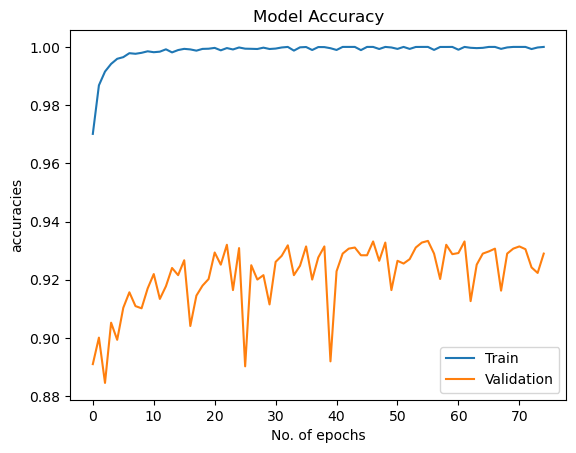

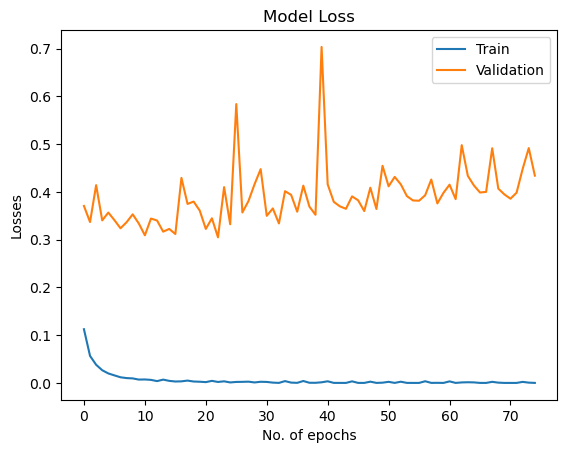

In [45]:
import matplotlib.pyplot as plt

plt.plot(trained.history['acc'])
plt.plot(trained.history['val_acc'])
plt.title('Model Accuracy')
plt.xlabel('No. of epochs')
plt.ylabel('accuracies')
plt.legend(['Train','Validation'])
plt.show()

plt.plot(trained.history['loss'])
plt.plot(trained.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('No. of epochs')
plt.ylabel('Losses')
plt.legend(['Train','Validation'])
plt.show()

In [30]:
import tensorflow as tf
tf.__version__

'2.10.0'

In [31]:
from tensorflow.keras.models import load_model
model.save('F:/Batanikaya/batanikaya_model_fin.py')

INFO:tensorflow:Assets written to: F:/Batanikaya/batanikaya_model_fin.py\assets


INFO:tensorflow:Assets written to: F:/Batanikaya/batanikaya_model_fin.py\assets


In [32]:
from tensorflow.keras.models import load_model
model.save('F:/Batanikaya/batanikaya_model_fin.hdf5')

In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict labels for the test set
y_pred = model.predict(X_test_scaled_mm)
y_pred_labels = np.argmax(y_pred, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_labels)

# Plot confusion matrix
plt.figure(figsize=(150, 130))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=plant_names, yticklabels=plant_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

165/165 [==============================] - 71s 299ms/step


In [34]:

from sklearn.metrics import balanced_accuracy_score

# Calculate balanced accuracy
balanced_acc = balanced_accuracy_score(y_test, y_pred_labels)

print("Balanced Accuracy:", balanced_acc)


Balanced Accuracy: 0.9565356852489908


In [35]:
correctly_classified = np.diag(conf_matrix).sum()
print(correctly_classified)
len(y_test)
np.unique(len(y_pred[0]))

4892


array([169])

In [36]:
print(np.unique(y_pred_labels)[0])
print(np.unique(np.argmax(y_pred,axis=1)))
np.unique(y_test)

0
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168]


array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168])

In [37]:
num_rows, num_columns = conf_matrix.shape
print("Number of rows in the confusion matrix:", num_rows)
print("Number of columns in the confusion matrix:", num_columns)


Number of rows in the confusion matrix: 169
Number of columns in the confusion matrix: 169


In [38]:
# Calculate the sum of each row along with the name of the row
sum_per_class = {}
for i in range(conf_matrix.shape[0]):
    plant_name = plant_names[i] if i < len(plant_names) else f"Class {i}"
    sum_per_class[plant_name] = np.sum(conf_matrix[i])

# Print the sum of each row with the name of the row
for plant_name, sum_value in sum_per_class.items():
    print(f"{plant_name}: {sum_value}")

Aloevera-Aloe barbadensis: 69
Amaranthus Green_Amaranthus viridis: 31
Amaranthus Red_Amaranthus tricolor: 22
Amla-Phyllanthus emlica Linn: 53
Amruta Balli-Tinospora cordifolia: 59
Arali-Nerium oleander: 59
Arive_Dantu_Amaranthus viridis: 31
Ashoka-Saraca asoca: 57
Ashwagandha_Withania somnifera: 37
Asthma plant_Euphorbia hirta: 20
Astma_weed: 20
Avacado_Persea americana: 37
Avaram_Senna auriculata: 16
Badipala: 19
Balloon vine_Cardiospermum halicacabum: 62
Bamboo-Bambusoideae: 66
Basale_Basella alba: 62
Beans-Vigna spp. (Genus) or Phaseolus spp. (Genus): 24
Bellyache bush (Green)_Jatropha gossypiifolia: 20
Benghal dayflower_ Commelina benghalensis: 14
Betel-Piper betle: 110
Betel_Nut_Areca catechu: 37
Big Caltrops_Tribulus terrestris: 16
Black-Honey Shrub_Tribulus terrestris: 26
Brahmi-Bacopa monnieri: 63
Bringaraja-Eclipta prostrata: 18
Bristly Wild Grape_Cissus quadrangularis: 16
Butterfly Pea_Clitoria ternatea: 13
Camphor-Cinnamomum camphora: 16
Cape Gooseberry_Physalis peruviana: 3

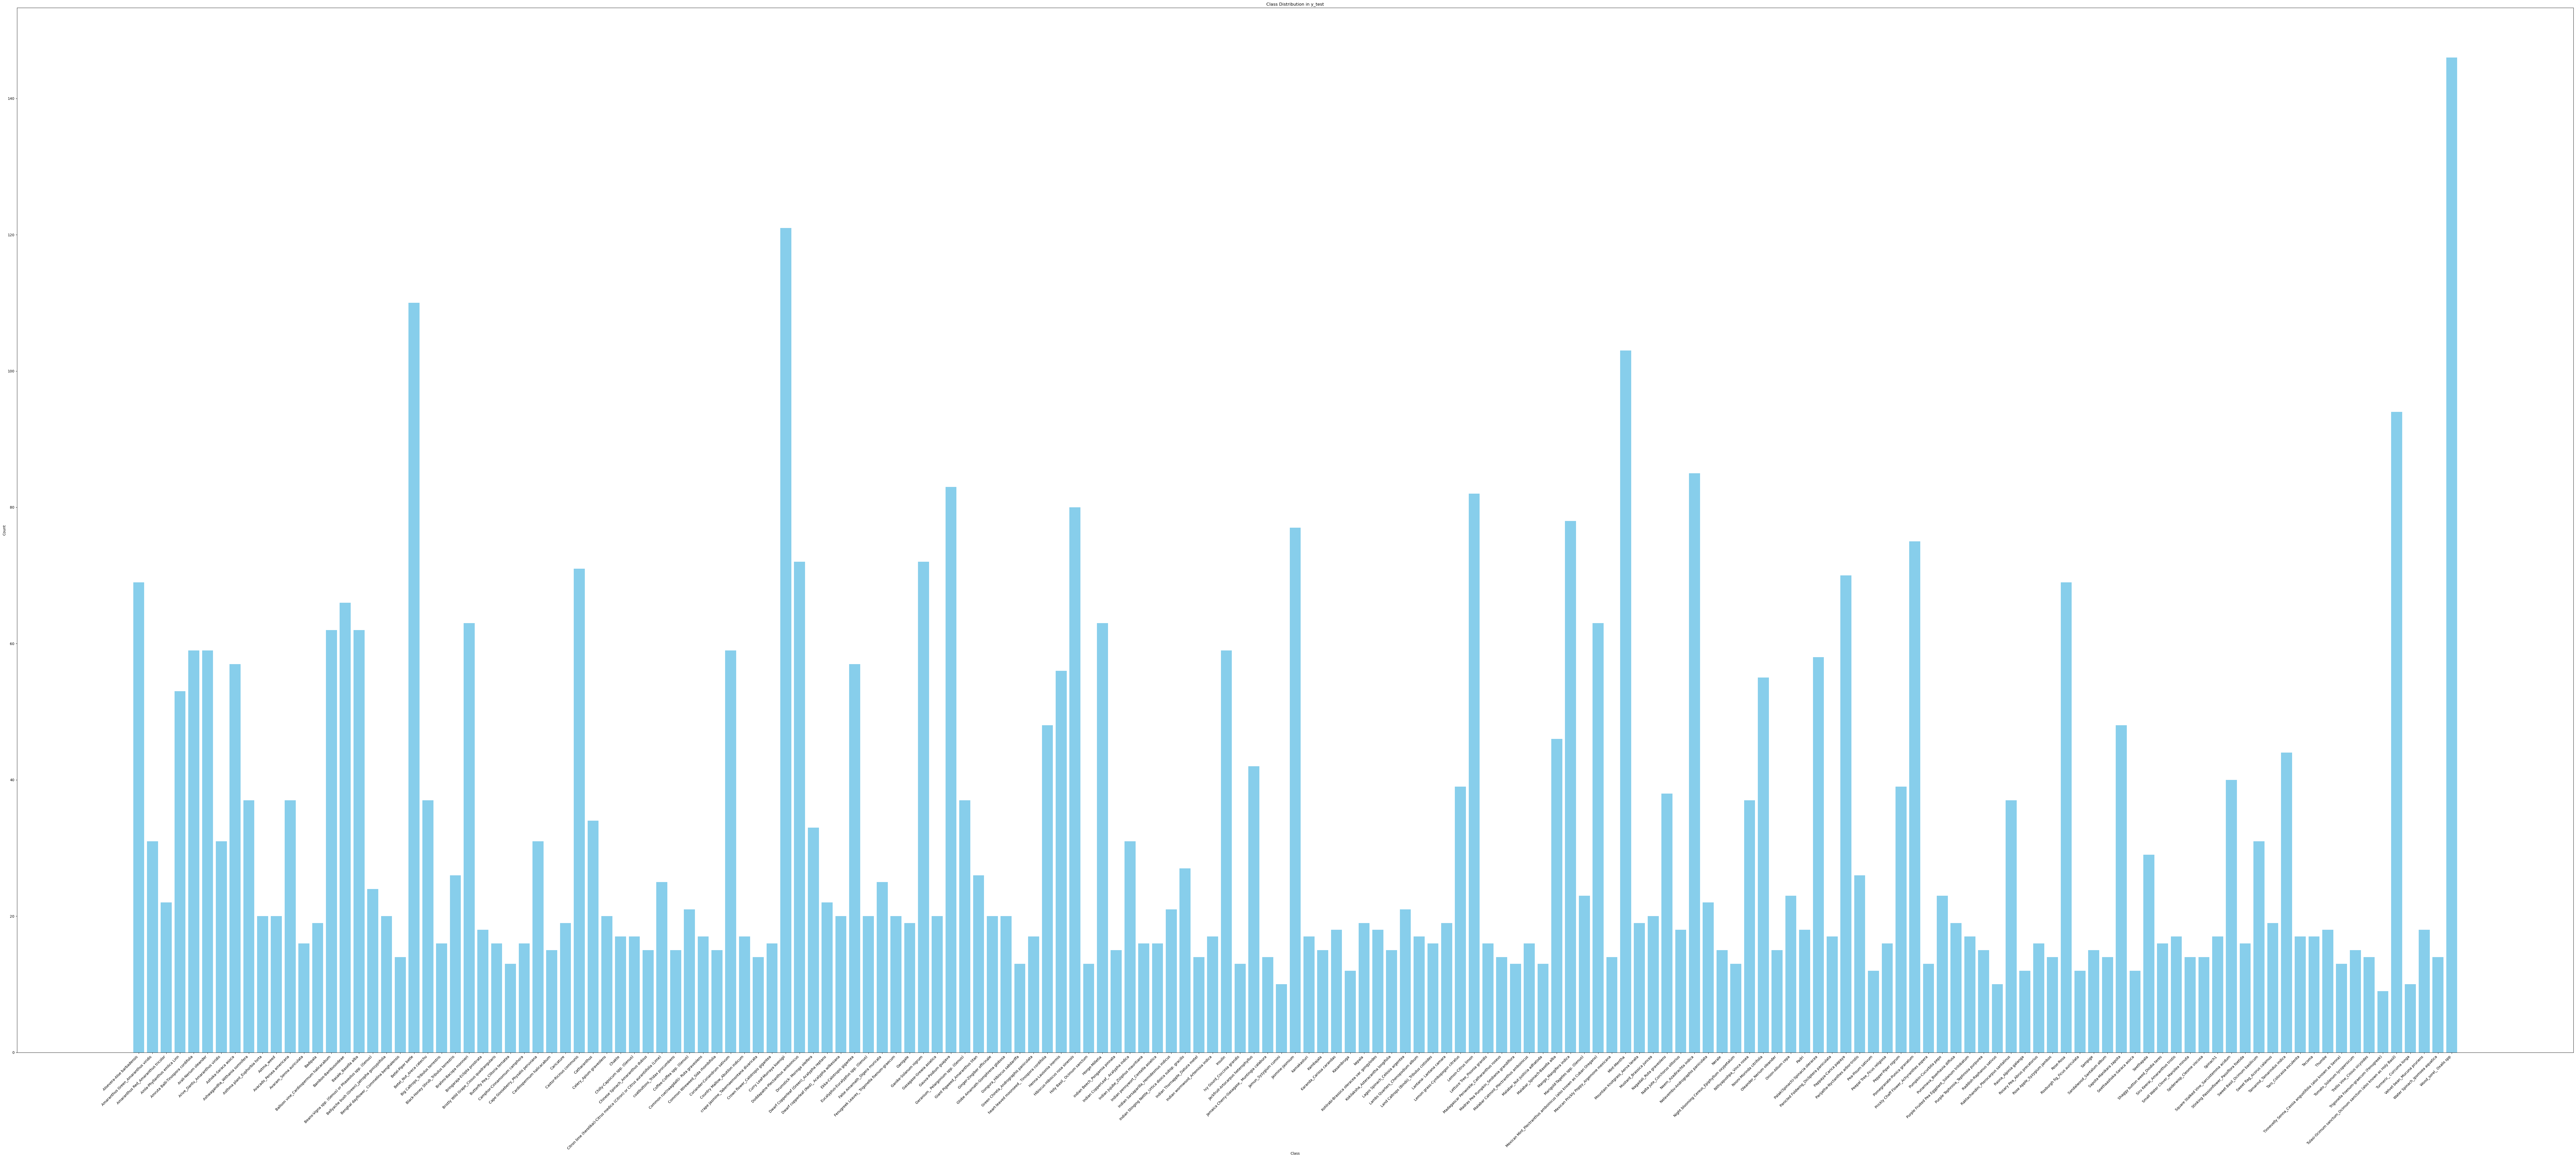

In [39]:
import matplotlib.pyplot as plt
# Count the occurrences of each class in y_test
unique_classes, class_counts = np.unique(y_test, return_counts=True)
# Create a histogram of y_test
plt.figure(figsize=(100, 45))
plt.bar(plant_names, class_counts, color='skyblue')

# Add labels and title
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution in y_test')
# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
# Show plot
plt.tight_layout()
plt.show()


In [40]:
# Calculate correctly and incorrectly classified samples for each plant
correct_per_class = {}
incorrect_per_class = {}
for i in range(conf_matrix.shape[0]):
    plant_name = plant_names[i] if i < len(plant_names) else f"Class {i}"
    correct_per_class[plant_name] = conf_matrix[i, i]
    incorrect_per_class[plant_name] = np.sum(conf_matrix[i]) - conf_matrix[i, i]

# Print the results for each plant
for plant_name in plant_names:
    print(f"{plant_name}: Correctly classified - {correct_per_class[plant_name]}, Incorrectly classified - {incorrect_per_class[plant_name]}")


Aloevera-Aloe barbadensis: Correctly classified - 63, Incorrectly classified - 6
Amaranthus Green_Amaranthus viridis: Correctly classified - 31, Incorrectly classified - 0
Amaranthus Red_Amaranthus tricolor: Correctly classified - 22, Incorrectly classified - 0
Amla-Phyllanthus emlica Linn: Correctly classified - 47, Incorrectly classified - 6
Amruta Balli-Tinospora cordifolia: Correctly classified - 43, Incorrectly classified - 16
Arali-Nerium oleander: Correctly classified - 58, Incorrectly classified - 1
Arive_Dantu_Amaranthus viridis: Correctly classified - 31, Incorrectly classified - 0
Ashoka-Saraca asoca: Correctly classified - 57, Incorrectly classified - 0
Ashwagandha_Withania somnifera: Correctly classified - 37, Incorrectly classified - 0
Asthma plant_Euphorbia hirta: Correctly classified - 20, Incorrectly classified - 0
Astma_weed: Correctly classified - 20, Incorrectly classified - 0
Avacado_Persea americana: Correctly classified - 37, Incorrectly classified - 0
Avaram_Sen

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Get the list of plant names
plant_names = list(correct_per_class.keys())

# Get the number of classes
num_classes = len(plant_names)

# Get the number of correctly and incorrectly classified samples for each class
correct_counts = [correct_per_class[plant_name] for plant_name in plant_names]
incorrect_counts = [incorrect_per_class[plant_name] for plant_name in plant_names]

# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars on the x-axis
r1 = np.arange(num_classes)
r2 = [x + bar_width for x in r1]

# Create the bar plot
plt.figure(figsize=(120, 60))
plt.bar(r1, correct_counts, color='skyblue', width=bar_width, edgecolor='grey', label='Correctly Classified')
plt.bar(r2, incorrect_counts, color='salmon', width=bar_width, edgecolor='grey', label='Incorrectly Classified')

# Add labels and title
plt.xlabel('Plant Names', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(num_classes)], plant_names, rotation=45, ha='right')
plt.title('Correctly and Incorrectly Classified Samples for Each Plant', fontweight='bold')

# Add legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


In [42]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming y_true contains the true labels and y_pred contains the predicted labels

# Calculate precision
precision = precision_score(y_test, y_pred_labels, average='weighted')

# Calculate recall
recall = recall_score(y_test, y_pred_labels, average='weighted')

# Calculate F1 score
f1 = f1_score(y_test, y_pred_labels, average='weighted')

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Precision: 0.9308734351956003
Recall: 0.9289783516900874
F1 Score: 0.9283007752731066


In [43]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_scaled_mm, y_test)

# Print the test loss and accuracy
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

165/165 [==============================] - 48s 289ms/step - loss: 0.4339 - acc: 0.9290
Test Loss: 0.43392425775527954
Test Accuracy: 0.9289783239364624


In [46]:
len(y_test)

5266

In [47]:
from tensorflow.keras.models import load_model
model.save('F:/Batanikaya/batanikaya_model_mobnet.hdf5')

In [91]:
Test_data_dir = r'C:\Users\suryan\Downloads\archive (1)\Indian Medicinal Leaves Image Datasets\Medicinal Leaf dataset'

In [92]:
Test_data_dir = pathlib.Path(Test_data_dir)
Test_plant_names = []
for class_name in os.listdir(Test_data_dir):
    Test_plant_names.append(class_name)
Test_plant_names

['Aloevera-Aloe barbadensis',
 'Amla-Phyllanthus emlica Linn',
 'Amruta Balli-Tinospora cordifolia',
 'Arali-Nerium oleander',
 'Ashoka-Saraca asoca',
 'Astma_weed',
 'Badipala',
 'Balloon vine_Cardiospermum halicacabum',
 'Bamboo-Bambusoideae',
 'Beans-Vigna spp. (Genus) or Phaseolus spp. (Genus)',
 'Betel-Piper betle',
 'Brahmi-Bacopa monnieri',
 'Bringaraja-Eclipta prostrata',
 'Camphor-Cinnamomum camphora',
 'Caricature',
 'Castor-Ricinus communis',
 'Catharanthus',
 'Chakte',
 'Chilly-Capsicum spp. (Genus)',
 'Citron lime (herelikai)-Citrus medica (Citron) or Citrus aurantiifolia (Lime)',
 'Coffee-Coffea spp. (Genus)',
 'Common rue(naagdalli)- Ruta graveolens',
 'Coriander-Coriandrum sativum',
 'Curry Leaf-Murraya koenigii',
 'Doddapatre-Plectanthus amboinicus',
 'Drumstick- Moringa oleifera',
 'Ekka-Calotropis gigantea',
 'Eucalyptus-Eucalyptus spp. (Genus)',
 'Ganigale',
 'Ganike-Solanum nigrum',
 'Gasagase-Grewia asiatica',
 'Gauva-Psidium guajava',
 'Ginger-Zingiber officinale

In [93]:

Test_plant_images_dict = {
     'Aloevera-Aloe barbadensis': list(Test_data_dir.glob('Aloevera-Aloe barbadensis/*')),
}
len(Test_plant_images_dict['Aloevera-Aloe barbadensis'])

118

In [107]:

for i in range (1,len(Test_plant_names)):
        Test_plant_images_dict[Test_plant_names[i]] = list(Test_data_dir.glob(Test_plant_names[i]+'/*'))

In [108]:
len(Test_plant_images_dict)

80

In [109]:
X_test_fr, y_test_fr = [], []
IMAGE_SHAPE = (224, 224)
for plant_name, images in Test_plant_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img, (224, 224))
        X_test_fr.append(resized_img)
        y_test_fr.append(plants_labels_dict[plant_name])


In [110]:
X_test_fr = np.array(X_test_fr)
y_test_fr = np.array(y_test_fr)

In [111]:
len(X_test_fr)

6900

In [112]:
X_test_fr_scaled = X_test_fr/255

In [113]:
len(X_test_fr_scaled)

6900

In [114]:

# Evaluate the model on the new test data
test_loss, test_acc = model.evaluate(X_test_fr, y_test_fr)

print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_acc}')


216/216 [==============================] - 71s 309ms/step - loss: 31.1922 - acc: 0.0154
Test loss: 31.192228317260742
Test accuracy: 0.015362318605184555


In [116]:
len(y_test_fr)

6900

In [ ]:
X, y = [], []
IMAGE_SHAPE = (224, 224)
for plant_name, images in plant_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img, (224, 224))
        X.append(resized_img)
        y.append(plants_labels_dict[plant_name])


In [129]:
from tensorflow.keras.applications import ResNet50
resnet = ResNet50(weights='imagenet',
                      input_shape= (224,224,3),
                      include_top= False) 
# Freeze the layers of the ResNet50 base
for layer in resnet.layers:
    layer.trainable = False

In [144]:
from tensorflow.keras import models, layers 
modelres = models.Sequential()

# Add the ResNet50 base
modelres.add(resnet)

# Add Global Average Pooling 2D layer
modelres.add(layers.GlobalAveragePooling2D())

# Add the final dense layer for classification
modelres.add(layers.Dense(num_classes, activation='softmax'))

# Print the model summary
modelres.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_5 (Dense)             (None, 169)               346281    
                                                                 
Total params: 23,933,993
Trainable params: 346,281
Non-trainable params: 23,587,712
_________________________________________________________________


In [147]:
modelres.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_5 (Dense)             (None, 169)               346281    
                                                                 
Total params: 23,933,993
Trainable params: 346,281
Non-trainable params: 23,587,712
_________________________________________________________________


In [148]:
modelres.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['acc']
)
trainedres = modelres.fit(
    X_train_scaled_mm, 
    y_train, 
    epochs=25, 
    validation_data=(X_test_scaled_mm, y_test)
)

Epoch 1/25


C:\Users\suryan\anaconda3\envs\botanicai\lib\site-packages\keras\backend.py:5582: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1976/1976 [==============================] - 2801s 1s/step - loss: 4.7576 - acc: 0.0493 - val_loss: 4.9480 - val_acc: 0.0524
Epoch 2/25
 676/1976 [=========>....................] - ETA: 26:57 - loss: 4.4783 - acc: 0.0770

KeyboardInterrupt: 

In [151]:
from tensorflow.keras import models, layers
from tensorflow.keras.applications import EfficientNetB0
eff = EfficientNetB0(include_top=False, weights='imagenet')
modeleff = models.Sequential()

# Add the ResNet50 base
modeleff.add(eff)

# Add Global Average Pooling 2D layer
modeleff.add(layers.GlobalAveragePooling2D())

# Add the final dense layer for classification
modeleff.add(layers.Dense(num_classes, activation='softmax'))

# Print the model summary
modelres.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_5 (Dense)             (None, 169)               346281    
                                                                 
Total params: 23,933,993
Trainable params: 346,281
Non-trainable params: 23,587,712
_________________________________________________________________


In [152]:

modeleff.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['acc']
)
trainedeff = modeleff.fit(
    X_train_scaled_mm, 
    y_train, 
    epochs=25, 
    validation_data=(X_test_scaled_mm, y_test)
)

Epoch 1/25
1976/1976 [==============================] - 4945s 2s/step - loss: 0.5559 - acc: 0.8593 - val_loss: 41.1043 - val_acc: 0.0108
Epoch 2/25
1976/1976 [==============================] - 4598s 2s/step - loss: 0.1498 - acc: 0.9548 - val_loss: 642.2636 - val_acc: 0.0148
Epoch 3/25
1976/1976 [==============================] - 4523s 2s/step - loss: 0.1061 - acc: 0.9691 - val_loss: 17.9063 - val_acc: 0.0112
Epoch 4/25
1976/1976 [==============================] - 4698s 2s/step - loss: 0.0857 - acc: 0.9728 - val_loss: 13.5476 - val_acc: 0.0023
Epoch 5/25
1976/1976 [==============================] - 4604s 2s/step - loss: 0.0723 - acc: 0.9784 - val_loss: 12.5183 - val_acc: 0.0123
Epoch 6/25
1892/1976 [===========================>..] - ETA: 3:11 - loss: 0.0673 - acc: 0.9799

KeyboardInterrupt: 

In [153]:
from tensorflow.keras import models, layers
from tensorflow.keras.applications import DenseNet121

# Load DenseNet121 without the top classification layer, and with ImageNet weights
densenet = DenseNet121(include_top=False, weights='imagenet')

# Initialize a new Sequential model
modeldensenet = models.Sequential()

# Add the DenseNet base
modeldensenet.add(densenet)

# Add Global Average Pooling 2D layer
modeldensenet.add(layers.GlobalAveragePooling2D())

# Add the final dense layer for classification
modeldensenet.add(layers.Dense(num_classes, activation='softmax'))

# Print the model summary
modeldensenet.summary()


29084464/29084464 [==============================] - 19s 1us/step
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, None, None, 1024)  7037504   
                                                                 
 global_average_pooling2d_2   (None, 1024)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_8 (Dense)             (None, 169)               173225    
                                                                 
Total params: 7,210,729
Trainable params: 7,127,081
Non-trainable params: 83,648
_________________________________________________________________


In [ ]:
modeldensenet.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['acc']
)
traineddense = modeldensenet.fit(
    X_train_scaled_mm, 
    y_train, 
    epochs=25, 
    validation_data=(X_test_scaled_mm, y_test)
)

Epoch 1/25
 225/1976 [==>...........................] - ETA: 2:10:54 - loss: 2.7307 - acc: 0.3993